# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Exercise 04

The aim of this exercise is to modify a given code to perform a Molecular Dynamics simulation of a Lennard-Jones fluid in a microcanonical ensemble (NVE), using the Verlet Algorithm.

*How to run the C++ code:*
1. *Copy the right input file to `input.dat` (choosing among `input.solid`, `input.liquid` and `input.gas`*
2. *Run `equilibration.sh`*
3. *Change the value of $nstep$ (sixth line) in `input.dat` from 10000 to 100000*
4. *Run `simulation.sh`*

*Before running the code, please empty the directory from the previous data, running `clean.sh`.*

## Exercise 04.1

The first part of the exercise consists in adding the possibility to **equilibrate** the system before making the actual simulation.
In fact, every simulation starts from a crystal structure, and it takes a few runs to reach the target temperature $T$.

The task consists in two parts:
1. Add the possibility to **restart from an old spatial configuration**, reading not only from the file `config.0` but also from the file **`old.0`**. In fact, in order to work, the Verlet algorithm needs both the positions at the time $t$ ($\vec{r}(t)$) and the positions ath the time $t - dt$ ($\vec{r}(t-dt)$). The code given had only the possibility to generate randomly the old configuration to start the simulation from. To accomplish the task I modified the `Input` function. Whether to generate the old spatial configutation or to read it from `old.0` is decided by a **bool** passed from command line (`argv[1]`). If it is $0$, the old spatial configuration is generated, if it is $1$ the old spatial configuration is read from file.

2. Add the possibility to **rescale the velocities** in order to match a desired temperature. This can be done thanks to a scaling factor, calculated comparing $v^2 \over 3$ with the target temperature $T$. Also in this case, the decision whether to rescale the velocities or not is made by a **bool** passed from command line (`argv[2]`). If it is $0$, the velocities are not rescaled, if it is $1$ the velocities are rescaled.

The graphs below show the processes of equilibration. For each phase, I made 8 runs of my code, each run consisting in 10000 steps, with the measurements taken every 10 steps. The first run starts from a crystal structure and generates randomly the old configuration, the others start from the configurations saved in `config.final` and `old.final` and rescale the velocities at the beginning of each run.


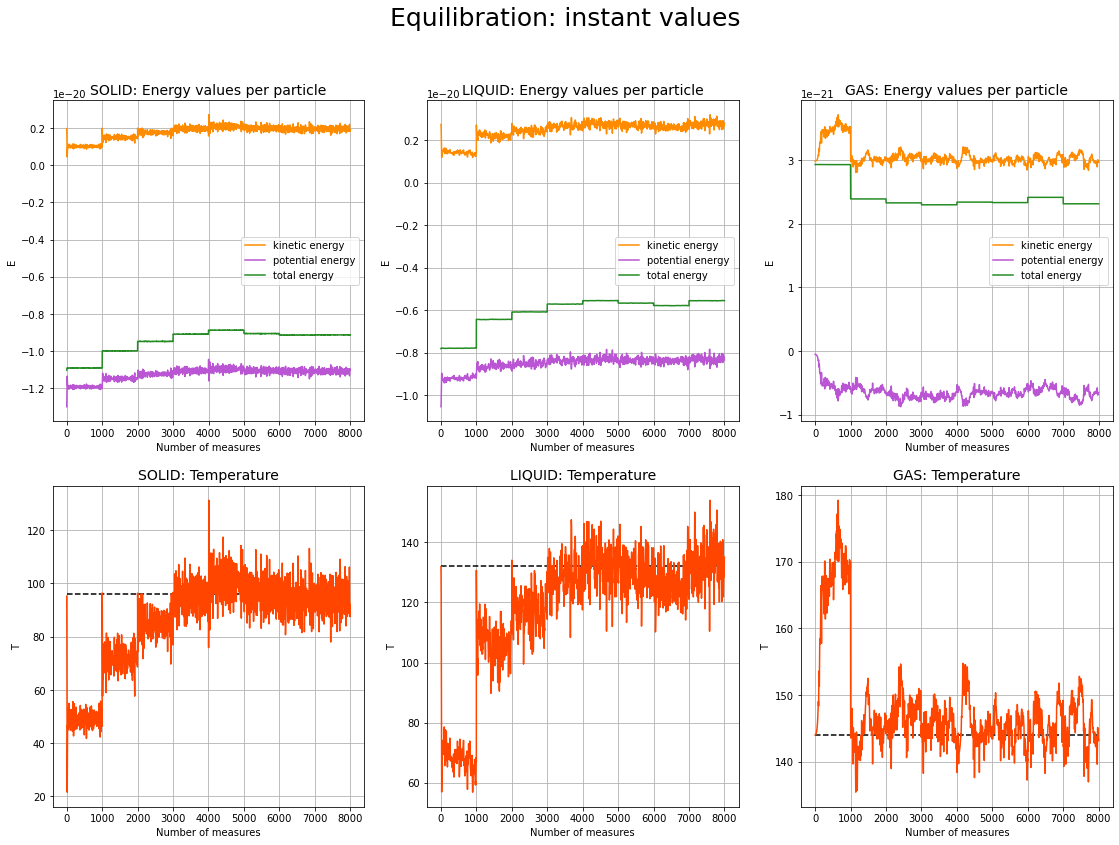

In [5]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

figure = plt.figure (figsize=(19, 13))
plt.suptitle ("Equilibration: instant values", fontsize = 25)

#Solid phase

#Loading from file
ekin = np.loadtxt ("S_output_ekin.dat", unpack = "true")
epot = np.loadtxt ("S_output_epot.dat", unpack = "true")
etot = np.loadtxt ("S_output_etot.dat", unpack = "true")
temp = np.loadtxt ("S_output_temp.dat", unpack = "true")

#SI units
ekin = ekin * 1.657E-21
epot = epot * 1.657E-21
etot = etot * 1.657E-21
temp = temp*120

#plotting energies
plt.subplot(2, 3, 1)

plt.plot(ekin, label = "kinetic energy", color = "darkorange")
plt.grid(True)

plt.plot(epot, label = "potential energy", color = "mediumorchid")
plt.grid(True)

plt.plot(etot, label = "total energy", color = "forestgreen")
plt.grid(True)

plt.ylabel ("E")
plt.xlabel ("Number of measures")
plt.title ("SOLID: Energy values per particle", fontsize = 14)
plt.legend()

#plotting temperature
plt.subplot(2, 3, 4)

plt.plot(temp, color = "orangered")
plt.grid(True)
plt.hlines (0.8*120, 0, 8000, linestyle = "dashed", color = "black")
plt.ylabel ("T")
plt.xlabel ("Number of measures")
plt.title ("SOLID: Temperature", fontsize = 14)

#Liquid phase

#Loading from file
ekin = np.loadtxt ("L_output_ekin.dat", unpack = "true")
epot = np.loadtxt ("L_output_epot.dat", unpack = "true")
etot = np.loadtxt ("L_output_etot.dat", unpack = "true")
temp = np.loadtxt ("L_output_temp.dat", unpack = "true")

#SI units
ekin = ekin * 1.657E-21
epot = epot * 1.657E-21
etot = etot * 1.657E-21
temp = temp*120

#plotting energies
plt.subplot(2, 3, 2)

plt.plot(ekin, label = "kinetic energy", color = "darkorange")
plt.grid(True)

plt.plot(epot, label = "potential energy", color = "mediumorchid")
plt.grid(True)


plt.plot(etot, label = "total energy", color = "forestgreen")
plt.grid(True)

plt.ylabel ("E")
plt.xlabel ("Number of measures")
plt.title ("LIQUID: Energy values per particle", fontsize = 14)
plt.legend()

#plotting temperature
plt.subplot(2, 3, 5)

plt.plot(temp, color = "orangered")
plt.grid(True)
plt.hlines (1.1*120, 0, 8000, linestyle = "dashed", color = "black")
plt.ylabel ("T")
plt.xlabel ("Number of measures")
plt.title ("LIQUID: Temperature", fontsize = 14)

#Gas phase

#Loading from file
ekin = np.loadtxt ("G_output_ekin.dat", unpack = "true")
epot = np.loadtxt ("G_output_epot.dat", unpack = "true")
etot = np.loadtxt ("G_output_etot.dat", unpack = "true")
temp = np.loadtxt ("G_output_temp.dat", unpack = "true")

#SI units
ekin = ekin * 1.657E-21
epot = epot * 1.657E-21
etot = etot * 1.657E-21
temp = temp*120

#plotting energies
plt.subplot(2, 3, 3)

plt.plot(ekin, label = "kinetic energy", color = "darkorange")
plt.grid(True)

plt.plot(epot, label = "potential energy", color = "mediumorchid")
plt.grid(True)


plt.plot(etot, label = "total energy", color = "forestgreen")
plt.grid(True)

plt.ylabel ("E")
plt.xlabel ("Number of measures")
plt.title ("GAS: Energy values per particle", fontsize = 14)
plt.legend()

#plotting temperature
plt.subplot(2, 3, 6)

plt.plot(temp, color = "orangered")
plt.grid(True)
plt.hlines (1.2*120, 0, 8000, linestyle = "dashed", color = "black")
plt.ylabel ("T")
plt.xlabel ("Number of measures")
plt.title ("GAS: Temperature", fontsize = 14)

plt.show()

The **temperature** graphs show quite well that it takes about three runs (i.e. 30000 steps) to the liquid and solid systems to equilibrate, and from the fourth run they reach the target temperature ($96K$ for the solid phase, $132 K$ for the liquid phase). The gas system, instead, reaches the target temperature ($144 K$) more quickly (after about 10000 steps).

## Exercises 4.2-4.3

The exercise 4.2 asked to add the possibility to calculate the **average values** of $E/N$ (total energy per particle), $U/N$ (potential energy per particle), $K/N$ (kinetic energy per particle) and $T$ (temperature), using the blocking method.
In fact, the code provided prints out only the instantaneous values. 
To accomplish the task, I modified the `Measure` function and I made use of my class  `Blocking`, which computes Blocking Average and writes the results on a file. I also added another bool passed from the command line (`argv[3]`). When it is $0$, the averages are not calculated, when it is $1$ they are calculated and printed out in the files `ave_epot.out`, `ave_ekin.out`, `ave_etot.out`, `ave_temp.out`.

The exercise 4.3 asked to perform a **simulation** of the element **Argon** in the three states (solid, liquid, gas), after the equilibration of the system. The parameters to start the simulations from were given in Lennard-Jones units. They are reported at the end of this notebook.
I decided to make $M=10^5$ total steps, divided in $N=100$ blocks of $L=10^3$ steps each.

Below the average values of the observables are reported, in SI units, as a function of the number of blocks.

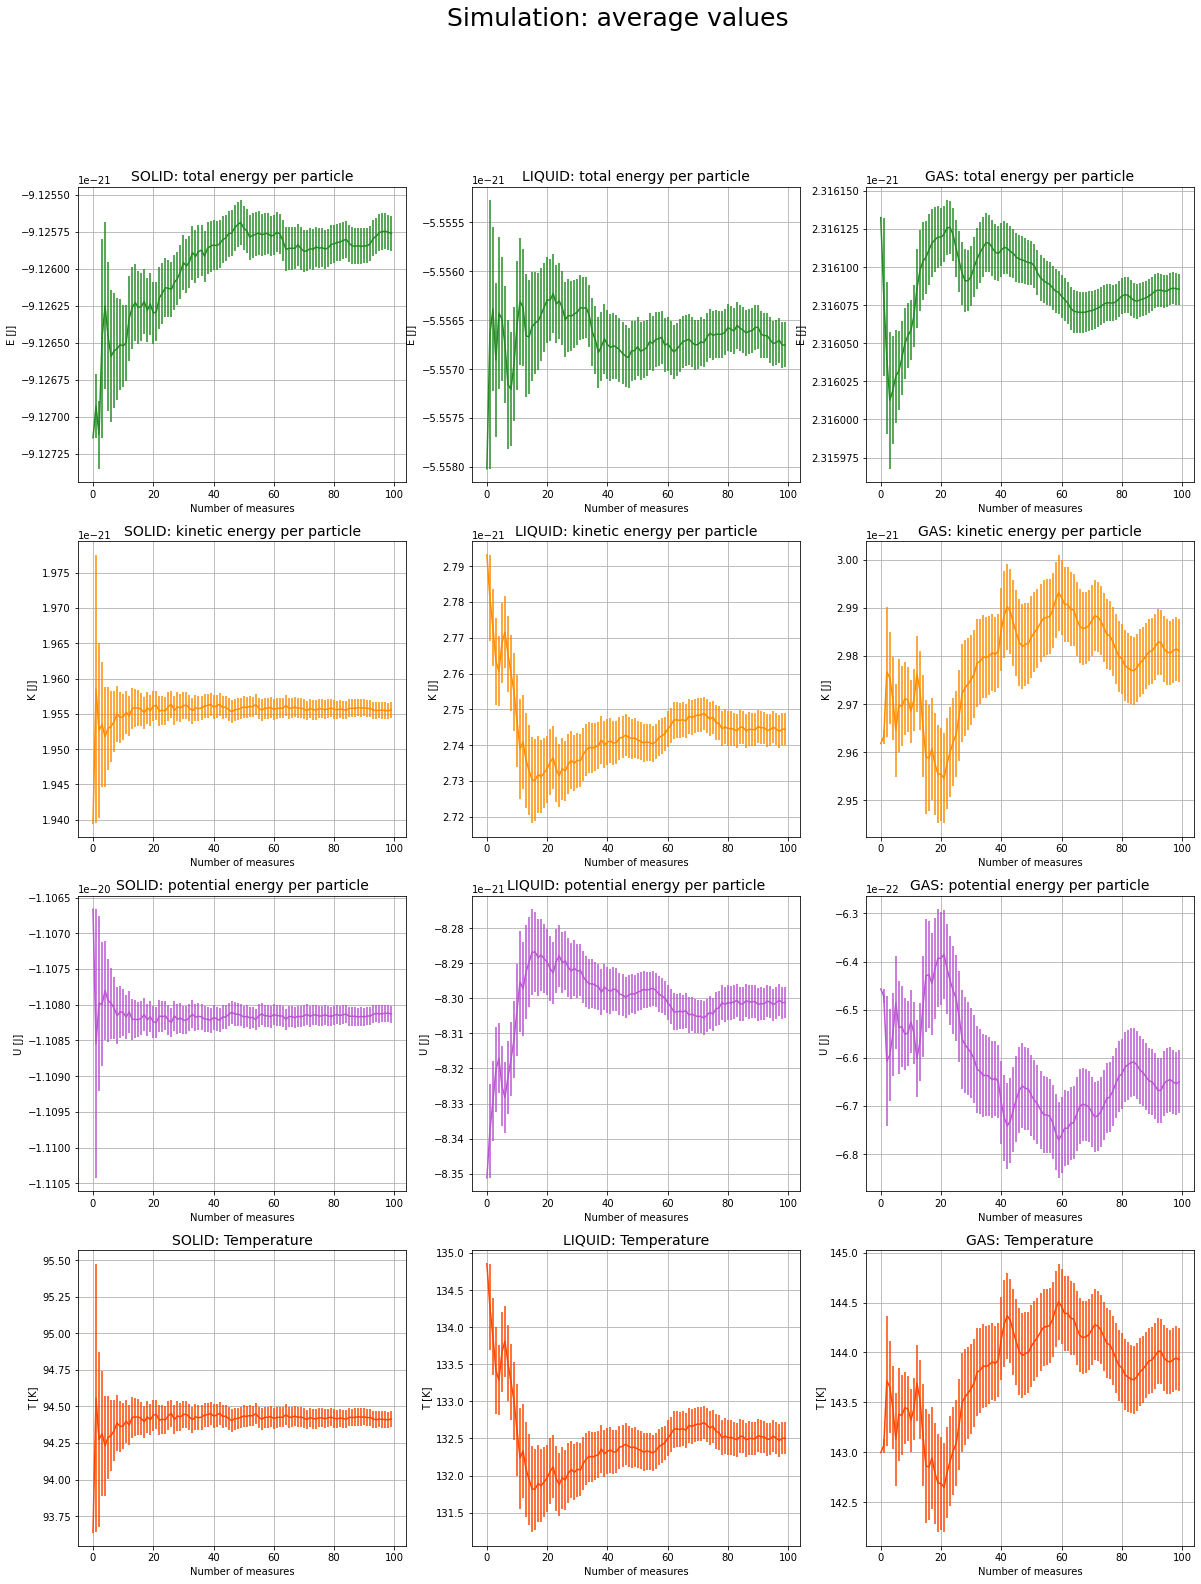

In [6]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

figure = plt.figure (figsize=(20, 25))
plt.suptitle ("Simulation: average values", fontsize = 25)

#######################################
#Solid phase
#######################################
 
#plotting the values

#Etot
x, y, err = np.loadtxt ("S_ave_etot.out", unpack = "true")
y = y * 1.657E-21
err = err * 1.657E-21
plt.subplot(4, 3, 1)
plt.errorbar(x, y, yerr=err, label = "total energy", color = "forestgreen")
plt.grid(True)
plt.ylabel ("E [J]")
plt.xlabel ("Number of measures")
plt.title ("SOLID: total energy per particle", fontsize = 14)

#Ekin
x, y, err = np.loadtxt ("S_ave_ekin.out", unpack = "true")
y = y * 1.657E-21
err = err * 1.657E-21
plt.subplot(4, 3, 4)
plt.errorbar(x, y, yerr=err, label = "kinetic energy", color = "darkorange")
plt.grid(True)
plt.ylabel ("K [J]")
plt.xlabel ("Number of measures")
plt.title ("SOLID: kinetic energy per particle", fontsize = 14)

#Epot
x, y, err = np.loadtxt ("S_ave_epot.out", unpack = "true")
y = y * 1.657E-21
err = err * 1.657E-21
plt.subplot(4, 3, 7)
plt.errorbar(x, y, yerr=err, label = "potential energy", color = "mediumorchid")
plt.grid(True)
plt.ylabel ("U [J]")
plt.xlabel ("Number of measures")
plt.title ("SOLID: potential energy per particle", fontsize = 14)

#temp
x, y, err = np.loadtxt ("S_ave_temp.out", unpack = "true")
y = y * 120
err = err * 120
plt.subplot(4, 3, 10)
plt.errorbar(x, y, yerr=err, color = "orangered")
plt.grid(True)
#plt.hlines (0.8*120, 0, 100, linestyle = "dashed", color = "black")
plt.ylabel ("T [K]")
plt.xlabel ("Number of measures")
plt.title ("SOLID: Temperature", fontsize = 14)

###############################################
#Liquid phase
###############################################

#plotting the values

#Etot
x, y, err = np.loadtxt ("L_ave_etot.out", unpack = "true")
y = y * 1.657E-21
err = err * 1.657E-21
plt.subplot(4, 3, 2)
plt.errorbar(x, y, yerr=err, label = "total energy", color = "forestgreen")
plt.grid(True)
plt.ylabel ("E [J]")
plt.xlabel ("Number of measures")
plt.title ("LIQUID: total energy per particle", fontsize = 14)

#Ekin
x, y, err = np.loadtxt ("L_ave_ekin.out", unpack = "true")
y = y * 1.657E-21
err = err * 1.657E-21
plt.subplot(4, 3, 5)
plt.errorbar(x, y, yerr=err, label = "kinetic energy", color = "darkorange")
plt.grid(True)
plt.ylabel ("K [J]")
plt.xlabel ("Number of measures")
plt.title ("LIQUID: kinetic energy per particle", fontsize = 14)

#Epot
x, y, err = np.loadtxt ("L_ave_epot.out", unpack = "true")
y = y * 1.657E-21
err = err * 1.657E-21
plt.subplot(4, 3, 8)
plt.errorbar(x, y, yerr=err, label = "potential energy", color = "mediumorchid")
plt.grid(True)
plt.ylabel ("U [J]")
plt.xlabel ("Number of measures")
plt.title ("LIQUID: potential energy per particle", fontsize = 14)

#temp
x, y, err = np.loadtxt ("L_ave_temp.out", unpack = "true")
y = y * 120
err = err * 120
plt.subplot(4, 3, 11)
plt.errorbar(x, y, yerr=err, color = "orangered")
plt.grid(True)
#plt.hlines (1.1*120, 0, 100, linestyle = "dashed", color = "black")
plt.ylabel ("T [K]")
plt.xlabel ("Number of measures")
plt.title ("LIQUID: Temperature", fontsize = 14)

############################################
#Gas phase
###########################################


#plotting the values

#Etot
x, y, err = np.loadtxt ("G_ave_etot.out", unpack = "true")
y = y * 1.657E-21
err = err * 1.657E-21
plt.subplot(4, 3, 3)
plt.errorbar(x, y, yerr=err, label = "total energy", color = "forestgreen")
plt.grid(True)
plt.ylabel ("E [J]")
plt.xlabel ("Number of measures")
plt.title ("GAS: total energy per particle", fontsize = 14)

#Ekin
x, y, err = np.loadtxt ("G_ave_ekin.out", unpack = "true")
y = y * 1.657E-21
err = err * 1.657E-21
plt.subplot(4, 3, 6)
plt.errorbar(x, y, yerr=err, label = "kinetic energy", color = "darkorange")
plt.grid(True)
plt.ylabel ("K [J]")
plt.xlabel ("Number of measures")
plt.title ("GAS: kinetic energy per particle", fontsize = 14)

#Epot
x, y, err = np.loadtxt ("G_ave_epot.out", unpack = "true")
y = y * 1.657E-21
err = err * 1.657E-21
plt.subplot(4, 3, 9)
plt.errorbar(x, y, yerr=err, label = "potential energy", color = "mediumorchid")
plt.grid(True)
plt.ylabel ("U [J]")
plt.xlabel ("Number of measures")
plt.title ("GAS: potential energy per particle", fontsize = 14)

x, y, err = np.loadtxt ("G_ave_temp.out", unpack = "true")
y = y * 120
err = err * 120
plt.subplot(4, 3, 12)
plt.errorbar(x, y, yerr=err, color = "orangered")
plt.grid(True)
#plt.hlines (1.1*120, 0, 100, linestyle = "dashed", color = "black")
plt.ylabel ("T [K]")
plt.xlabel ("Number of measures")
plt.title ("GAS: Temperature", fontsize = 14)

plt.show()

Lennard-Jones units for Argon:
- $\sigma = 0.34$ nm (length unit)
- $\epsilon/k_B = 120$ K (temperature unit)
- $m=39.948$ amu (mass unit)

Parameters:
- solid phase: $\rho^\star = 1.1$ , $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)